## Optimization Methods in AI

### OPtimization methods are used to minimize loss function.
They are used in training models, fine-tuning models, reinforcement Learning,
probabilistic inference (MLE, MAP), Hyperparameter Tuning, etc.

In [1]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

#settign th random seed
torch.manual_seed(42)

In [2]:
X,y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X = StandardScaler().fit_transform(X)
y = y.reshape(-1,1)


In [3]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [4]:
def compute_loss(y_pred, y_true):
    epsilon = 1e-15
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

## A - First Order Optimization methods

###  1 - Gradient descent (GD) θ:=θ−η∇J(θ)

In [5]:

def Stochastic_Gradient_Descent(X, y,learning_rate, epochs = 50):
    w = np.zeros((X.shape[1],1))
    b = 0
    losses =[]
    for _ in range(epochs):
        z = X@w + b
        y_pred = sigmoid(z)
        loss = compute_loss(y_pred, y)
        losses.append(loss)

        #Computing gradients
        dz = y_pred - y
        dw = X.T @ dz / len(X)
        db = np.mean(dz)
        w -= learning_rate * dw
        b -= learning_rate * db
    return w, b , losses

    

[0.6931471805599435, 0.6901491076144645, 0.6871917211010371, 0.6842744209946682, 0.6813966114670329, 0.67855770116085, 0.6757571034476697, 0.6729942366692846, 0.6702685243630102, 0.6675793954711253, 0.664926284534797, 0.6623086318728431, 0.6597258837457145, 0.6571774925051038, 0.6546629167296075, 0.6521816213468843, 0.6497330777427701, 0.6473167638578181, 0.6449321642717434, 0.642578770276255, 0.6402560799367663, 0.6379635981434701, 0.6357008366522684, 0.6334673141160424, 0.6312625561067444, 0.6290860951287869, 0.6269374706241956, 0.6248162289699877, 0.6227219234682241, 0.6206541143291732, 0.618612368648016, 0.6165962603755054, 0.6146053702829832, 0.6126392859221451, 0.6106976015799256, 0.6087799182288702, 0.606885843473337, 0.6050149914918654, 0.6031669829760312, 0.6013414450660904, 0.5995380112837095, 0.5977563214620547, 0.5959960216735074, 0.5942567641552572, 0.5925382072330097, 0.5908400152430362, 0.5891618584527761, 0.5875034129801967, 0.585864360712095, 0.5842443892215272]


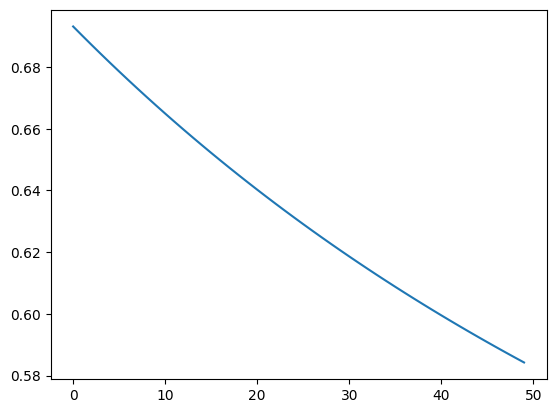

In [6]:
w, b , losses = Stochastic_Gradient_Descent(X, y, learning_rate=0.01, epochs=50)
print(losses)
plt.plot(losses)

### 2: NAG (Nesterov Accelerated gradient)

In [7]:
def Normal_acceleration(X,y,learning_rate, beta=0.9, epochs=50):
    w = np.zeros((X.shape[1],1))
    b =0
    vw = np.zeros_like(w)
    vb =0
    losses = []
    for _ in range(epochs):
        z = X@w + b
        y_pred = sigmoid(z)
        loss = compute_loss(y_pred, y)
        losses.append(loss)
        dz = y_pred - y
        dw = X.T @dz / len(X)
        db = np.mean(dz)

        vw = beta*vw + learning_rate*dw
        vb = beta*vb + learning_rate*db
        w -= vw
        b -= vb

    return w, b, losses

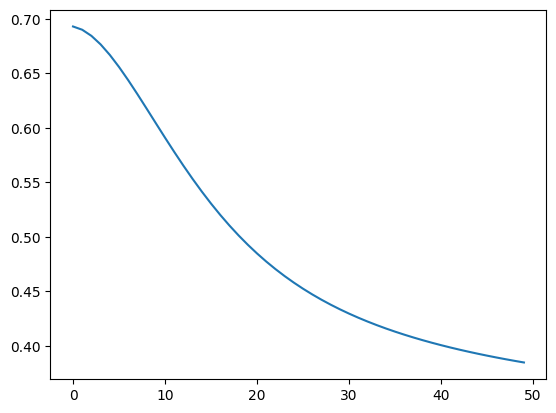

In [8]:
w, b, losses = Normal_acceleration(X,y, 0.01)
plt.plot(losses)

In [9]:
losses

[0.6931471805599435,
 0.6901491076144645,
 0.6845292814076636,
 0.6766870809518623,
 0.6670269777258953,
 0.6559436743880683,
 0.6438101035132986,
 0.6309681551628633,
 0.6177220736355904,
 0.604334459523537,
 0.5910247343130722,
 0.5779698005497971,
 0.5653065049067102,
 0.5531354247720484,
 0.541525473806726,
 0.5305188586571998,
 0.5201360010958119,
 0.5103801438435581,
 0.501241462766578,
 0.49270059843123076,
 0.48473158921416437,
 0.47730423539532,
 0.47038595167970854,
 0.4639431787324634,
 0.45794242705041327,
 0.45235102269442407,
 0.4471376170360707,
 0.4422725138080495,
 0.4377278577241155,
 0.433477720523681,
 0.4294981128804257,
 0.4257669443230696,
 0.42226394812964096,
 0.418970583974253,
 0.4158699277933267,
 0.4129465557550385,
 0.4101864272281513,
 0.40757677013613275,
 0.40510597094902434,
 0.4027634707257771,
 0.4005396680064208,
 0.3984258289128883,
 0.3964140045074121,
 0.39449695524537387,
 0.39266808222001026,
 0.3909213648101171,
 0.3892513042941679,
 0.3876528

In [10]:
def Nesterov_acceleration(X,y,learning_rate, beta=0.9, epochs=50):
    w = np.zeros((X.shape[1],1))
    b =0
    vw = np.zeros_like(w)
    vb =0
    losses = []
    for _ in range(epochs):
        w_la = w - beta*vw
        b_la = b - beta*vb
        z = X@w_la + b_la
        y_pred = sigmoid(z)
        loss = compute_loss(y_pred, y)
        losses.append(loss)
        dz = y_pred - y
        dw = X.T @dz / len(X)
        db = np.mean(dz)

        vw = beta*vw + learning_rate*dw
        vb = beta*vb + learning_rate*db
        w -= vw
        b -= vb

    return w, b, losses
        

    

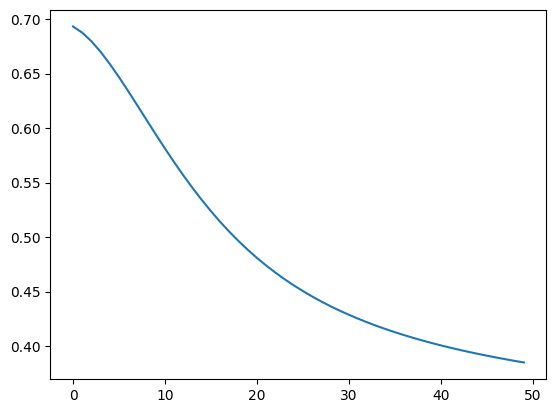

In [11]:
w, b, losses = Nesterov_acceleration(X,y, 0.01)
plt.plot(losses)

In [12]:
losses

[0.6931471805599435,
 0.6874683631015722,
 0.6795680345388925,
 0.6698639217115109,
 0.6587588719414695,
 0.646629393320043,
 0.6338171595220852,
 0.6206233220285406,
 0.6073054706683176,
 0.5940770095455222,
 0.5811086057358756,
 0.568531267056332,
 0.5564405484260492,
 0.5449013895376759,
 0.5339531443819134,
 0.5236144565005958,
 0.5138877398501192,
 0.504763124992132,
 0.49622181252663644,
 0.48823883594891776,
 0.48078527527713255,
 0.47382998446161717,
 0.46734090425845465,
 0.4612860321984276,
 0.45563411599962966,
 0.45035512883442413,
 0.4454205760124172,
 0.4408036739594611,
 0.43647943445378395,
 0.432424680193331,
 0.4286180119781329,
 0.4250397430454962,
 0.4216718122825921,
 0.4184976850268157,
 0.4155022478145204,
 0.41267170162937683,
 0.40999345682433563,
 0.4074560318546014,
 0.4050489571880446,
 0.40276268519344594,
 0.40058850639769655,
 0.39851847221264836,
 0.39654532403123793,
 0.39466242845798855,
 0.39286371835357825,
 0.39114363932352386,
 0.3894971012571176,


## 3: Adagrad (Adaptive Gradient)

Adaptive Gradient is next version of SGD where the learning rate changes rather being constant. <br>
G(t) = np.mean(g(i)) \n <br>
w(t+1) = w(t) - (learning_rate / np.sqrt(G(t)+epsilon)). g(t) <br>
Cons: Can lead to Vanishing Gradient. Not ideal for non-convex problems i.e. Deep network.

In [13]:
def adagrad(X, y, learning_rate=0.01, epochs = 50, epsilon=0.1):
    w = np.zeros((X.shape[1],1))
    b = 0
    losses = []
    grad_w = np.zeros_like(w)
    grad_b = 0
    for _ in range(epochs):
        z = X@w + b
        y_pred = sigmoid(z)
        loss = compute_loss(y_pred, y)
        losses.append(loss)
        dz = y_pred - y
        dw = X.T @ dz / len(X)
        db = np.mean(dz)
        grad_w = grad_w + dw**2
        grad_b = grad_b + db**2
        w = w-learning_rate*dw /(np.sqrt(grad_w) + epsilon)
        b = b- learning_rate*db / (np.sqrt(grad_b)+ epsilon)
    
    return w,b, losses


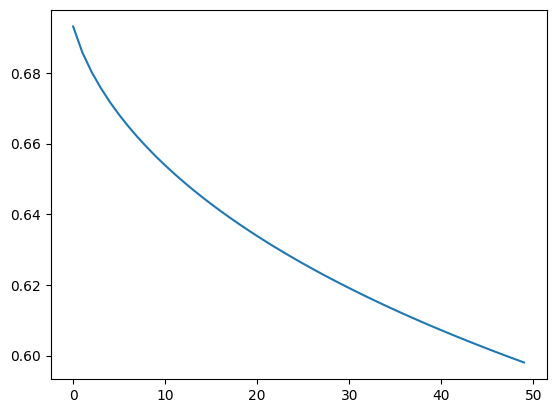

In [14]:
w, b, losses = adagrad(X,y)
plt.plot(losses)

## 4: RMS prop (Root mean square Propagation)

RMS prop uses the same adaptive gradient method just solves its ever growing accumulated gradient problems.<br>
G(t) = sigma* G(t^2) + (1-sigma)gt^2 <br>
w = w - LR*g(t) / (np.sqrt(G(t)) + epsilon)<br>
pros: it solves the adagrad problem <br>
cons: learning rate will still need tuning


In [15]:
def RMSpropGrad(X, y, learning_rate=0.1, sigma=0.9, epochs=50, epsilon = 0.2):
    w = np.zeros((X.shape[1],1))
    b = 0
    w_grad = np.zeros_like(w)
    b_grad = 0
    losses =[]
    for _ in range(epochs):
        z = X@w + b
        y_pred = sigmoid(z)
        loss = compute_loss(y, y_pred)
        losses.append(loss)
        dz = y_pred - y
        dw = X.T @ dz / len(X)
        db = np.mean(dz)
        w_grad = sigma*(w_grad) + (1-sigma)*(dw**2)
        b_grad = sigma*(b_grad) + (1-sigma)*(db**2)
        w = w - learning_rate*dw/ (np.sqrt(w_grad) + epsilon)
        b = b - learning_rate*db / ( np.sqrt(b_grad) + epsilon)
    return w, b , losses



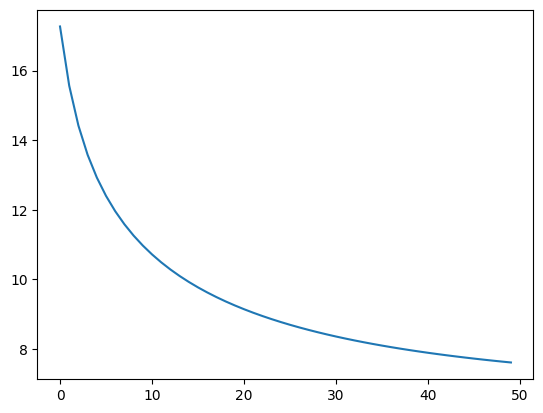

In [16]:
w, b, losses = RMSpropGrad(X,y)
plt.plot(losses)

## 5:ADAM (Adaptive Moment Estimation) <br>
Adam uses MomentumGD and RMSProp gradient rates together to perform out of the box. <br>


In [17]:
def Adam(X, y, epochs=50, learningRate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
    w = np.zeros((X.shape[1],1))
    b=0

    m_w = np.zeros_like(w)
    v_w = np.zeros_like(w)
    m_b , v_b = 0, 0
    losses =[]

    for i in range(1, epochs+1):
        z = X@w + b
        y_pred = sigmoid(z)
        loss = compute_loss(y_pred, y)
        losses.append(loss)
        dz = y_pred - y
        dw = X.T@dz/ len(X)
        db = np.mean(dz)

        m_w = beta1*m_w + (1-beta1)*dw
        v_w = beta2*v_w + (1-beta2)*(dw**2)
        m_b = beta1*m_b + (1-beta1)*db
        v_b = beta2*v_b + (1-beta2)*(db**2)

        m_w_hat = m_w / (1-beta1**i)
        v_w_hat = v_w / (1-beta2**i)
        m_b_hat = m_b / (1-beta1**i)
        v_b_hat = v_b/(1-beta2**i)

        w-= learningRate * m_w_hat / (np.sqrt(v_w_hat) + epsilon)
        b-= learningRate * m_b_hat / (np.sqrt(v_b_hat) + epsilon)
    return w, b, losses

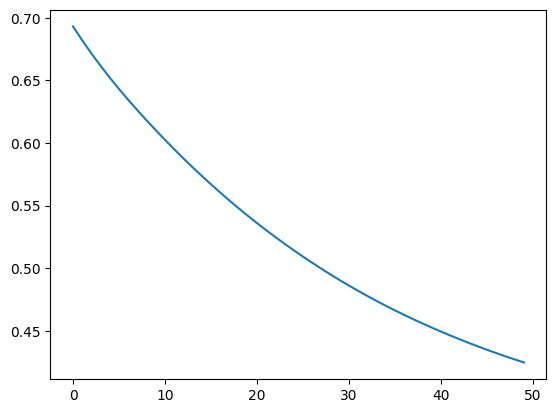

In [18]:
w,b, losses = Adam(X,y)
plt.plot(losses)